# Seattle Crime Data

This is my first time at using Pandas and matplotlib,  and as I've had to learn them it has taken me a long time to achieve not very much, and I expect there are much quicker and better ways to achieve what I've done here. 

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

df = pd.read_csv("seattle_incidents_summer_2014.csv")

/Users/alex/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Let's have a look at the data
print(df.columns)

Index([u'RMS CDW ID', u'General Offense Number', u'Offense Code',
       u'Offense Code Extension', u'Offense Type', u'Summary Offense Code',
       u'Summarized Offense Description', u'Date Reported',
       u'Occurred Date or Date Range Start', u'Occurred Date Range End',
       u'Hundred Block Location', u'District/Sector', u'Zone/Beat',
       u'Census Tract 2000', u'Longitude', u'Latitude', u'Location', u'Month',
       u'Year'],
      dtype='object')


In [4]:
df.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [83]:
#print(df.dtypes)
#uniqueTypes = df["Offense Type"].unique()
#print uniqueTypes
#uniqueTypes.sort()
#print uniqueTypes
#for ot in uniqueTypes:
#    print (ot.split('-'))

In [6]:
uniqueDesc = df["Summarized Offense Description"].unique()
uniqueDesc.sort()
print uniqueDesc

['ANIMAL COMPLAINT' 'ASSAULT' 'BIAS INCIDENT' 'BIKE THEFT' 'BURGLARY'
 'BURGLARY-SECURE PARKING-RES' 'CAR PROWL' 'COUNTERFEIT'
 'DISORDERLY CONDUCT' 'DISPUTE' 'DISTURBANCE' 'DUI' 'ELUDING' 'EMBEZZLE'
 'ESCAPE' 'FALSE REPORT' 'FIREWORK' 'FORGERY' 'FRAUD' 'HOMICIDE'
 'ILLEGAL DUMPING' 'INJURY' 'LIQUOR VIOLATION' 'LOST PROPERTY' 'MAIL THEFT'
 'NARCOTICS' 'OBSTRUCT' 'OTHER PROPERTY' 'PICKPOCKET' 'PORNOGRAPHY'
 'PROPERTY DAMAGE' 'PROSTITUTION' 'PUBLIC NUISANCE' 'PURSE SNATCH'
 'RECKLESS BURNING' 'RECOVERED PROPERTY' 'ROBBERY' 'SHOPLIFTING'
 'STOLEN PROPERTY' 'THEFT OF SERVICES' 'THREATS' 'TRAFFIC' 'TRESPASS'
 'VEHICLE THEFT' 'VIOLATION OF COURT ORDER' 'WARRANT ARREST' 'WEAPON'
 '[INC - CASE DC USE ONLY]']


In [84]:
#How are offense type and description related?
df['Type and Desc'] = df["Offense Type"].astype(str).str.cat(df["Summarized Offense Description"].astype(str), sep=',')
uniqueDesc = df["Type and Desc"].unique()
uniqueDesc.sort()
print uniqueDesc

['ANIMAL-BITE,ANIMAL COMPLAINT' 'ANIMAL-CRUELTY,ANIMAL COMPLAINT'
 'ANIMAL-OTH,ANIMAL COMPLAINT' 'ASSLT-AGG-BODYFORCE,ASSAULT'
 'ASSLT-AGG-GUN,ASSAULT' 'ASSLT-AGG-POLICE-BODYFORCE,ASSAULT'
 'ASSLT-AGG-POLICE-GUN,ASSAULT' 'ASSLT-AGG-POLICE-WEAPON,ASSAULT'
 'ASSLT-AGG-WEAPON,ASSAULT' 'ASSLT-NONAGG,ASSAULT'
 'ASSLT-NONAGG-POLICE,ASSAULT' 'BIAS INCIDENT,BIAS INCIDENT'
 'BURGLARY-FORCE-NONRES,BURGLARY' 'BURGLARY-FORCE-RES,BURGLARY'
 'BURGLARY-NOFORCE-NONRES,BURGLARY' 'BURGLARY-NOFORCE-RES,BURGLARY'
 'BURGLARY-SECURE PARKING-NONRES,BURGLARY'
 'BURGLARY-SECURE PARKING-RES,BURGLARY-SECURE PARKING-RES'
 'COUNTERFEIT,COUNTERFEIT' 'DISORDERLY CONDUCT,DISORDERLY CONDUCT'
 'DISPUTE-CIVIL PROPERTY (AUTO),DISPUTE'
 'DISPUTE-CIVIL PROPERTY (NON AU,DISPUTE' 'DISPUTE-OTH,DISPUTE'
 'DISTURBANCE-NOISE,DISTURBANCE' 'DISTURBANCE-OTH,DISTURBANCE'
 'DRIVE-BY,ASSAULT' 'DUI-DRUGS,DUI' 'DUI-LIQUOR,DUI'
 'ELUDING-FELONY FLIGHT,ELUDING' 'EMBEZZLE,EMBEZZLE' 'ENDANGERMENT,ASSAULT'
 'ESCAPE,ESCAPE' 'FALSE REPORT,FALS

In [85]:
#Ok we can just use the description
print(df["Summarized Offense Description"].unique())

['BURGLARY' 'FRAUD' 'MAIL THEFT' 'COUNTERFEIT' 'OTHER PROPERTY' 'EMBEZZLE'
 'CAR PROWL' 'THREATS' 'PROPERTY DAMAGE' 'LOST PROPERTY' 'FORGERY'
 'VEHICLE THEFT' 'BURGLARY-SECURE PARKING-RES' 'PICKPOCKET' 'BIKE THEFT'
 'NARCOTICS' 'DISPUTE' 'ASSAULT' 'STOLEN PROPERTY' 'WARRANT ARREST'
 'TRAFFIC' 'SHOPLIFTING' 'DISTURBANCE' 'VIOLATION OF COURT ORDER'
 'ILLEGAL DUMPING' 'PROSTITUTION' 'ROBBERY' 'TRESPASS' 'LIQUOR VIOLATION'
 'BIAS INCIDENT' 'THEFT OF SERVICES' 'HOMICIDE' 'RECOVERED PROPERTY'
 'OBSTRUCT' 'RECKLESS BURNING' 'INJURY' 'WEAPON' 'PURSE SNATCH'
 'FALSE REPORT' 'ELUDING' 'ANIMAL COMPLAINT' 'PORNOGRAPHY' 'DUI' 'FIREWORK'
 '[INC - CASE DC USE ONLY]' 'PUBLIC NUISANCE' 'DISORDERLY CONDUCT' 'ESCAPE']


In [10]:
#give category a snappier name
df['Category'] = df["Summarized Offense Description"]

Category
CAR PROWL                      6230
OTHER PROPERTY                 3755
BURGLARY                       3212
VEHICLE THEFT                  3057
PROPERTY DAMAGE                2365
ASSAULT                        2018
FRAUD                          1473
DISTURBANCE                    1333
THREATS                        1178
STOLEN PROPERTY                1136
WARRANT ARREST                 1021
SHOPLIFTING                     944
BIKE THEFT                      797
ROBBERY                         736
TRESPASS                        486
NARCOTICS                       391
BURGLARY-SECURE PARKING-RES     388
MAIL THEFT                      264
TRAFFIC                         252
PROSTITUTION                    202
DISPUTE                         171
LOST PROPERTY                   162
COUNTERFEIT                     159
PICKPOCKET                      146
WEAPON                          137
ANIMAL COMPLAINT                 96
THEFT OF SERVICES                96
VIOLATION OF COURT 

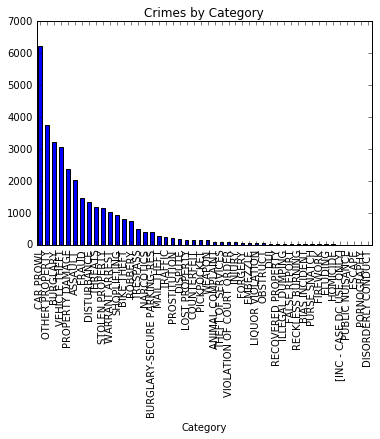

In [11]:
#No. of crimes per category
groups = df.groupby("Category")["Category"].count()
groups = groups.sort_values(ascending=0)
plt.figure()
groups.plot(kind='bar', title="Crimes by Category")
print(groups)

In [12]:
#What is this car prowl we hear of?
carProwl = df[df['Category']=='CAR PROWL']
carProwl.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Type and Desc,Category
16,372869,2015902549,2305,0,THEFT-CARPROWL,2300,CAR PROWL,04/10/2015 01:45:00 PM,08/01/2014 05:30:00 PM,08/03/2014 04:30:00 PM,...,B,B3,4600.2002,-122.332700,47.671600,"(47.671600027, -122.332699994)",8,2014,"THEFT-CARPROWL,CAR PROWL",CAR PROWL
26,171781,2015901516,2305,0,THEFT-CARPROWL,2300,CAR PROWL,03/06/2015 04:10:00 PM,08/24/2014 10:00:00 PM,08/25/2014 07:00:00 AM,...,Q,Q2,5900.2014,-122.371535,47.647658,"(47.647657953, -122.371535475)",8,2014,"THEFT-CARPROWL,CAR PROWL",CAR PROWL
27,87112,2015245985,2305,0,THEFT-CARPROWL,2300,CAR PROWL,03/02/2015 05:24:00 AM,07/26/2014 08:00:00 PM,NaN,...,Q,Q2,7100.1004,-122.370627,47.628803,"(47.628802746, -122.370627019)",7,2014,"THEFT-CARPROWL,CAR PROWL",CAR PROWL
53,1107152,2014420296,2305,0,THEFT-CARPROWL,2300,CAR PROWL,12/20/2014 03:27:00 PM,07/25/2014 07:00:00 PM,07/26/2014 10:00:00 AM,...,L,L2,700.4001,-122.302682,47.714793,"(47.714793029, -122.302681694)",7,2014,"THEFT-CARPROWL,CAR PROWL",CAR PROWL
100,1089847,2014376962,2305,0,THEFT-CARPROWL,2300,CAR PROWL,11/10/2014 02:38:00 PM,07/06/2014 10:00:00 AM,NaN,...,E,E3,9100.1002,-122.317125,47.600438,"(47.600437691, -122.317125251)",7,2014,"THEFT-CARPROWL,CAR PROWL",CAR PROWL


Ok, so it's thefts from cars. 

In [14]:
#Let's look at time of day thefts from cars occurred
df['Datetime'] = df['Occurred Date or Date Range Start'].map(lambda s: pd.Timestamp(s))
df['Hour'] = df['Datetime'].map(lambda x: x.hour)
df['EndDatetime'] = df['Occurred Date Range End'].map(lambda s: pd.Timestamp(s))
df['EndHour'] = df['EndDatetime'].map(lambda x: x.hour)
df.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Latitude,Location,Month,Year,Type and Desc,Category,Datetime,Hour,EndDatetime,EndHour
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,...,47.682524,"(47.68252427, -122.364671996)",6,2014,"BURGLARY-FORCE-RES,BURGLARY",BURGLARY,2014-06-28 10:31:00,10,2015-06-28 10:31:00,10.0
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,...,47.639901,"(47.639900761, -122.277080248)",6,2014,"FRAUD-IDENTITY THEFT,FRAUD",FRAUD,2014-06-01 00:00:00,0,2015-06-24 11:09:00,11.0
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,...,47.529232,"(47.529232299, -122.349312181)",8,2014,"THEFT-MAIL,MAIL THEFT",MAIL THEFT,2014-08-31 09:00:00,9,NaT,NaN
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,...,47.612368,"(47.612368448, -122.334817763)",6,2014,"COUNTERFEIT,COUNTERFEIT",COUNTERFEIT,2014-06-20 13:38:00,13,NaT,NaN
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,...,47.685960,"(47.685959879, -122.329378505)",6,2014,"THEFT-OTH,OTHER PROPERTY",OTHER PROPERTY,2014-06-01 11:59:00,11,2014-11-01 12:00:00,12.0


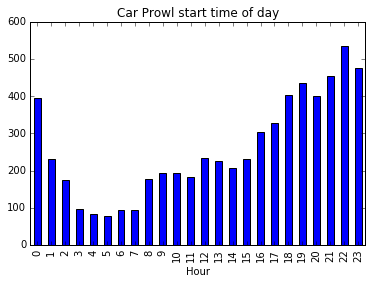

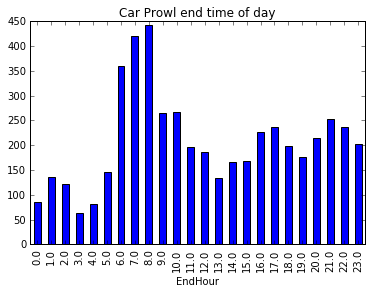

In [15]:
carProwl = df[df['Category']=='CAR PROWL']
carProwl.head()
carProwlHrs = carProwl.groupby('Hour')["Category"].count()
plt.figure()
carProwlHrs.plot(kind="bar", title="Car Prowl start time of day")
#print(carProwlHrs)

carProwlHrs = carProwl.groupby('EndHour')["Category"].count()
plt.figure()
carProwlHrs.plot(kind="bar", title="Car Prowl end time of day")
#print(carProwlHrs)

It looks like the start and end time of reported thefts from cars correspond to the times the car owner left and returned to their vehicle, infering the break-in occurred between those times. We see that thefts from cars tend to happen at night. Let's take the midpoint of the start and end times as an estimate of when the break-in actually occurred. 

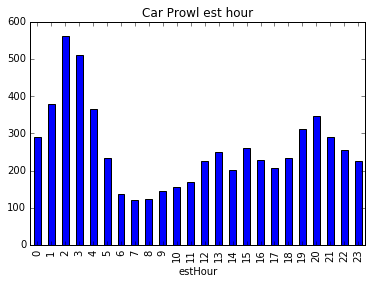

In [16]:
df['estTime'] = df['Datetime'] + (df['EndDatetime'] - df['Datetime'])/2
#where end time is missing, use start time
#df[df['estTime'].isnull()]['estTime'] = df['Datetime']
#df['estTime'].fillna(df['Datetime'])
df['estTime'] = df.apply(lambda r:  r['Datetime'] if pd.isnull(r['estTime']) else r['estTime'], axis=1)
df['estHour'] = df['estTime'].map(lambda x: x.hour)
carProwl = df[df['Category']=='CAR PROWL']
carProwl.head()
carProwlHrs = carProwl.groupby('estHour')["Category"].count()
plt.figure()
carProwlHrs.plot(kind="bar", title="Car Prowl est hour")

Ok, now we can clearly see thefts from cars are most common at night, peaking around 2am, but also high around 8pm. 

0     782
1     824
2     875
3     878
4     921
5     945
6    1005
Name: DayOfWeek, dtype: int64


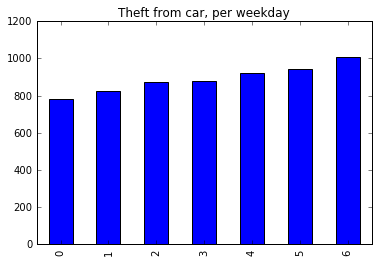

In [20]:
#Any variation throughout the week?
df['DayOfWeek'] = df['Datetime'].map(lambda x: x.dayofweek)

#prowlsPerWeekday = carProwl['Datetime'].map(lambda x: x.dayofweek).value_counts()
carProwl = df[df['Category']=='CAR PROWL']
prowlsPerWeekday = carProwl['DayOfWeek'].value_counts()
prowlsPerWeekday.sort_values(inplace=True)
print(prowlsPerWeekday)
prowlsPerWeekday.plot(kind="bar", title="Theft from car, per weekday")

Thefts from cars increases throughout the week, reaching a peak on Sunday. 

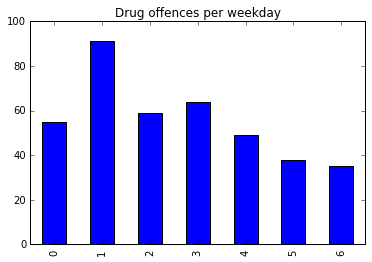

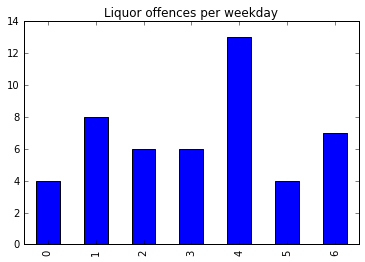

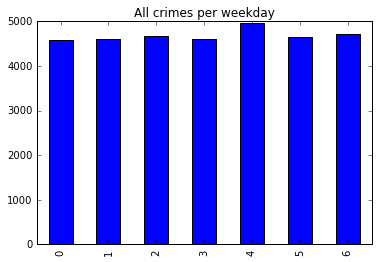

In [79]:
#Check our days are correct. 

drugsByDay = df[df['Category']=='NARCOTICS']['DayOfWeek'].value_counts()
drugsByDay.sort_index(inplace=True)
drugsByDay.plot(kind="bar", title="Drug offences per weekday")

plt.figure()
byDay = df[df['Category']=='LIQUOR VIOLATION']['DayOfWeek'].value_counts()
byDay.sort_index(inplace=True)
byDay.plot(kind="bar", title="Liquor offences per weekday")
alc = df[df['Category']=='LIQUOR VIOLATION']

plt.figure()
allByDay = df['DayOfWeek'].value_counts()
allByDay.sort_index(inplace=True)
allByDay.plot(kind="bar", title="All crimes per weekday")

/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


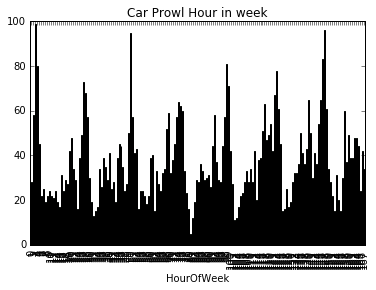

In [22]:
#How does it vary by time of day over the week?
carProwl['HourOfWeek'] = carProwl['estTime'].map(lambda x: x.dayofweek * 24 + x.hour)
#carProwl.apply(lambda r: r['estTime'].dayofweek * 24)
#carProwl.head()
carProwlHrs = carProwl.groupby('HourOfWeek')["Category"].count()
plt.figure()
carProwlHrs.plot(kind="bar", color="green", title="Car Prowl Hour in week")

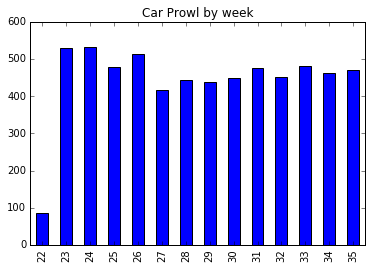

In [23]:
#Has car crime varied over time?
plt.figure()
#carProwl.head()
#print (carProwl.columns)
carProwlWks = carProwl.groupby(lambda idx: carProwl['Datetime'].loc[idx].weekofyear)["Category"].count()
carProwlWks.plot(kind="bar", title="Car Prowl by week")


The first week is probably an incomplete week. 

## Plotting crimes on a map

In [28]:
print(df['Longitude'].min(), df['Longitude'].max(), df['Latitude'].min(), df['Latitude'].max())
df['Longitude'][df['Longitude']<0].max()
df['Latitude'][df['Latitude']>0].min()

(-122.425315024, 0.0, 0.0, 47.749606049999997)


47.465062973000002

In [30]:
lon_lat_box = (df['Longitude'].min(), df['Longitude'][df['Longitude']<0].max(), df['Latitude'][df['Latitude']>0].min(), df['Latitude'].max())
print lon_lat_box

(-122.425315024, -122.238969938, 47.465062973000002, 47.749606049999997)


In [75]:
carXY = carProwl[(carProwl['Longitude']<0) & (carProwl['Latitude']>0)]
#x = carProwl['Longitude'] - lon_lat_box[0]
#carXY[['Longitude','Latitude']].head()
carXY['Longitude'].min()
carXY['X'] = (carXY['Longitude'] - lon_lat_box[0]) / (lon_lat_box[1]-lon_lat_box[0]) * xpx
#carXY['X'].head()
print carXY['Latitude'].max()
print carXY['X'].max()
carXY['Y'] = (carXY['Latitude'] - lon_lat_box[2]) / (lon_lat_box[3]-lon_lat_box[2]) * ypx
print carXY['Y'].max()

47.733936472
536.150137589
1181.16341924


/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I don't have an accurate map of the city bounded by our lat-lon box. I've had to very approximately take a screenshot from Google Maps with some lat-lon help from OSM. 

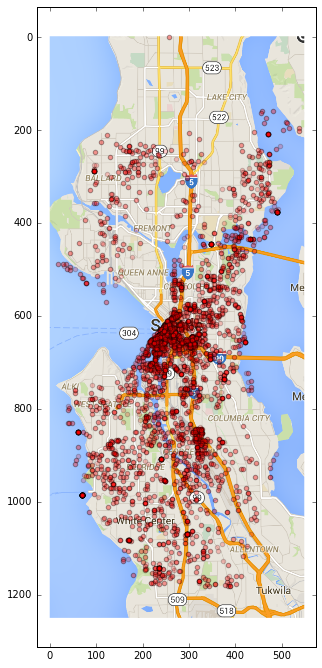

In [82]:
import matplotlib.image as mpimg
img=mpimg.imread('seattle_gmap.png')
#osm
#xpx=554
#ypx=1232
#gmap
xpx=546
ypx=1250
my_dpi=96
plt.figure(figsize=(xpx/my_dpi, ypx/my_dpi), dpi=my_dpi)
plt.imshow(img)
area=20
plt.scatter(carXY['X'], carXY['Y'], s=area, c='red', alpha=0.20)
plt.savefig('carprowl_map.png')

Clearly my map is badly scaled, as some of the points are on water. But I think it does show the hotspots for vehicle crime, mainly downtown. 

I'm out of time sadly. I wanted to look at police zones and other categories of crime. 